<a href="https://colab.research.google.com/github/t6nand/mltasks/blob/master/NeuralNetBinClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

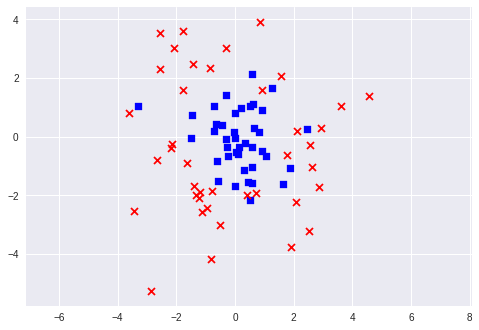

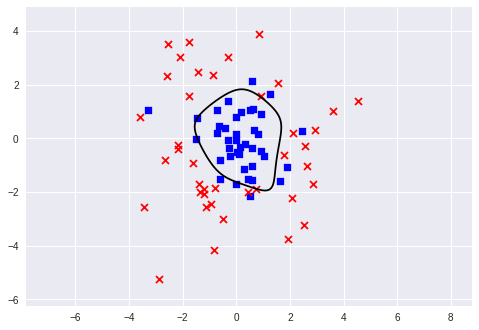

Cost:31.415906


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from dataset2_logreg import DataSet  

#get and plot the data
y_D,x_D = DataSet.get_data()
DataSet.plot_data()
plt.show()

# Cross Entropy cost function
def ce_cost(x_arr, y_arr, predict_f):    
  y_eq_0 = (y_arr==0).nonzero()[1]
  y_eq_1 = (y_arr==1).nonzero()[1]
  a = predict_f(x_arr)
  cost = np.sum( -np.log2(a[0][y_eq_1])) + np.sum( -np.log2(1-a[0][y_eq_0]))
  return cost  

#cost L2
def l2_cost(x_D, y_D, predict_f):
    y_predicted = predict_f(x_D)
    return np.sum(0.5*(y_predicted-y_D)**2)
  
# Activation Functions

def indentity(x):
    return x
  
def d_indentity(x):
    return np.ones(x.shape)
  
def relu(x):
    return np.maximum(x, np.zeros(x.shape))
  
def d_relu(x):
    return (x>0).astype(float)
  
def sigmoid(x):
    return 1/(1+np.exp(-x))
  
def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))
    
class NNet:
    
    # Initilaizations
    def __init__(self, layers, act_hid, d_act_hid, act_out, d_act_out):
        self.layers = layers
        self.L = len(layers) - 1
        self.act_hid = act_hid
        self.d_act_hid = d_act_hid        
        self.act_out = act_out
        self.d_act_out = d_act_out        
        self.W, self.b = self.init_Wb()
        
    # Initializing model parameters     
    def init_Wb(self):
        W, b = {}, {}
        mu = 0
        sigma = 1
        for i in range(1,self.L+1):
            W[i] = np.random.normal(mu,sigma,(self.layers[i],self.layers[i-1]))
            b[i] = np.random.normal(mu,sigma,(self.layers[i],1))
        return W, b
    
    # Forward Propogation
    def fp(self, x):
        a, z = {}, {}
        a[0] = x
        L = self.L
        for i in range(1,L):
            z[i] = self.W[i].dot(a[i-1]) + self.b[i]
            a[i] = self.act_hid(z[i])    
            
        z[L] = self.W[L].dot(a[L-1]) + self.b[L]    
        a[L] = self.act_out(z[L]) 
        return a,z 
      
    # Back Propogation 
    def bp(self, x, y):
      a,z = self.fp(x)
      L = self.L

      dCdz = { L: (a[L]-y)/a[L]/(1-a[L])*self.d_act_out(z[L]) }
      for l in range(L-1,0,-1):
          dCdz[l] = self.W[l+1].T.dot(dCdz[l+1]) * self.d_act_hid(z[l])

      db = {}
      for l in range(1,L+1):
          db[l] = np.sum(dCdz[l], axis=1).reshape((-1,1))

      dW = {}
      for l in range(1,L+1):
          dW[l] = dCdz[l].dot(a[l-1].T)
      return dW, db
    
    # Gradient Descent Learning
    def gd_learn(self, iter_num, l_rate, x, y):
      for i in range(iter_num):
        dW, db = self.bp(x, y)  
        for l in range(1, self.L+1):
            self.W[l] = self.W[l] - l_rate*dW[l]
            self.b[l] = self.b[l] - l_rate*db[l] 
      return 0
   
    # Gradient Descent Regularised Learning
    def gd_learn_reg(self, iter_num, l_rate, x, y, lbd=0):
      for i in range(iter_num):
        dW, db = self.bp(x, y)  
        for l in range(1, self.L+1):
            self.W[l] = self.W[l] - l_rate*(dW[l] + 2*lbd*self.W[l])
            self.b[l] = self.b[l] - l_rate*db[l] 
      return 0   
    
    # Provides outoput from neuron at the output layer    
    def output(self, x):
        a_out = None
        a, _ = self.fp(x)
        a_out = a[self.L]
        return a_out 
      
# Prepare & Train the non regularised model 
reg_flag = True
lbd = 0.07
NN = NNet((2,6,6,1), sigmoid, d_sigmoid, sigmoid, d_sigmoid)  

if reg_flag:
  NN.gd_learn_reg(50000, 0.05, x_D, y_D, lbd)
else:
  NN.gd_learn(50000, 0.01, x_D, y_D)

#plot and compute cost
DataSet.plot_decision_boundary(NN.output)
plt.show()
print('Cost:%f' % ce_cost(x_D, y_D, NN.output)) 